In [1]:
%pylab inline
import torch

Populating the interactive namespace from numpy and matplotlib


In [81]:
X = torch.tensor([[-2,2],[-2,-2],[2,-2],[2,2]]).float()
Y = X[:,0]/abs(X[:,0])

In [82]:
X = torch.cat((X,X),axis=0)
X = torch.cat((X,X),axis=0)
Y = torch.cat((Y,Y),axis=0)
Y = torch.cat((Y,Y),axis=0)


In [18]:
X.shape,Y.shape

(torch.Size([16, 2]), torch.Size([16]))

In [29]:
def linear_normal(X, Y):
    '''
    Arguments:
        X (n x d FloatTensor): the feature matrix
        Y (n x 1 FloatTensor): the labels

    Returns:
        (d + 1) x 1 FloatTensor: the parameters w
    '''
    
    #temp = torch.ones(Y.shape).reshape(-1,1)
    #X2 = torch.cat((temp,X),1)
    #w = torch.pinverse(X2)@Y
    w = torch.pinverse(X)@Y
    return w

In [30]:
w = linear_normal(X,Y)

In [31]:
w

tensor([5.0000e-01, 1.8626e-09])

In [35]:
def svm_solver(x_train, y_train, lr, num_iters,
               c=None):
    '''
    Computes an SVM given a training set, training labels, the number of
    iterations to perform projected gradient descent, a kernel, and a trade-off
    parameter for soft-margin SVM.

    Arguments:
        x_train: 2d tensor with shape (n, d).
        y_train: 1d tensor with shape (n,), whose elememnts are +1 or -1.
        lr: The learning rate.
        num_iters: The number of gradient descent steps.
        kernel: The kernel function.
           The default kernel function is 1 + <x, y>.
        c: The trade-off parameter in soft-margin SVM.
           The default value is None, referring to the basic, hard-margin SVM.

    Returns:
        alpha: a 1d tensor with shape (n,), denoting an optimal dual solution.
               Initialize alpha to be 0.
               Return alpha.detach() could possibly help you save some time
               when you try to use alpha in other places.

    Note that if you use something like alpha = alpha.clamp(...) with
    torch.no_grad(), you will have alpha.requires_grad=False after this step.
    You will then need to use alpha.requires_grad_().
    Alternatively, use in-place operations such as clamp_().
    '''
    #pass
    n = x_train.shape[0]
    #K = np.array([kernel(xi,xj) for xi in x_train for xj in x_train]).reshape(n,n) 
    #K = torch.from_numpy(K)
    a = torch.zeros(n,requires_grad = True)
    
    def loss_func(a):
        return 0.5*torch.sum(torch.outer(a,a) * torch.outer(y_train,y_train)) - torch.sum(a)
    
    for i in range(num_iters):
        
        loss_func(a).backward()    
        with torch.no_grad():
            a -= lr * a.grad
            #a = torch.clamp(a,min=0)
            a.clamp_(min=0,max=c)
            a.grad.zero_()
           
    return a

In [44]:
a_svm = svm_solver(X,Y,0.1,100)

In [49]:
a_svm * Y #* X

tensor([-10.0000, -10.0000,  10.0000,  10.0000, -10.0000, -10.0000,  10.0000,
         10.0000, -10.0000, -10.0000,  10.0000,  10.0000, -10.0000, -10.0000,
         10.0000,  10.0000], grad_fn=<MulBackward0>)

In [50]:
s = 0
for i in range(X.shape[0]):
    s += (a_svm * Y)[i] * X[i]

In [51]:
s

tensor([320.0000,   0.0000], grad_fn=<AddBackward0>)

In [83]:
tempx = torch.tensor([1,2]).reshape(1,-1)
tempy = torch.tensor([-1])
X = torch.cat((X,tempx),axis=0)
Y = torch.cat((Y,tempy),axis=0)

In [84]:
tempx.shape,tempy.shape,Y.shape

(torch.Size([1, 2]), torch.Size([1]), torch.Size([17]))

In [85]:
X

tensor([[-2.,  2.],
        [-2., -2.],
        [ 2., -2.],
        [ 2.,  2.],
        [-2.,  2.],
        [-2., -2.],
        [ 2., -2.],
        [ 2.,  2.],
        [-2.,  2.],
        [-2., -2.],
        [ 2., -2.],
        [ 2.,  2.],
        [-2.,  2.],
        [-2., -2.],
        [ 2., -2.],
        [ 2.,  2.],
        [ 1.,  2.]])

In [86]:
Y

tensor([-1., -1.,  1.,  1., -1., -1.,  1.,  1., -1., -1.,  1.,  1., -1., -1.,
         1.,  1., -1.])

In [71]:
w = linear_normal(X,Y)

In [72]:
w

tensor([0.5072, 0.0145])

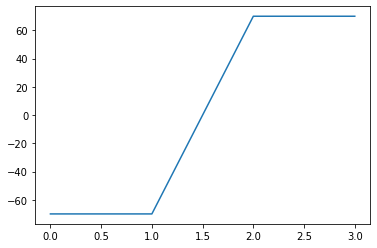

In [77]:
plot(w[0]/w[1]*X[:4,0])

In [75]:
w[0]/w[1]*X[:,0]

tensor([-70.0000, -70.0000,  70.0000,  70.0000, -70.0000, -70.0000,  70.0000,
         70.0000, -70.0000, -70.0000,  70.0000,  70.0000, -70.0000, -70.0000,
         70.0000,  70.0000,  35.0000])

In [87]:
a_svm = svm_solver(X,Y,0.1,100)

In [88]:
s = 0
for i in range(X.shape[0]):
    s += (a_svm * Y)[i] * X[i]

In [94]:
s[0]/s[1]

tensor(-16.4938, grad_fn=<DivBackward0>)

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

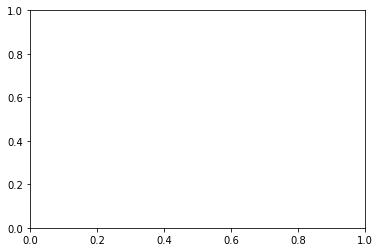

In [91]:
plot(s[0]/s[1]*X[:,0])